<a href="https://colab.research.google.com/github/tamojeetroychowdhury/Gaia-Data-Analysis/blob/main/M71_Isochrone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gaia_isochrones

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gaia_isochrones (from versions: none)
ERROR: No matching distribution found for gaia_isochrones


In [2]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 92.7 MB/s eta 0:00:00


In [3]:
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


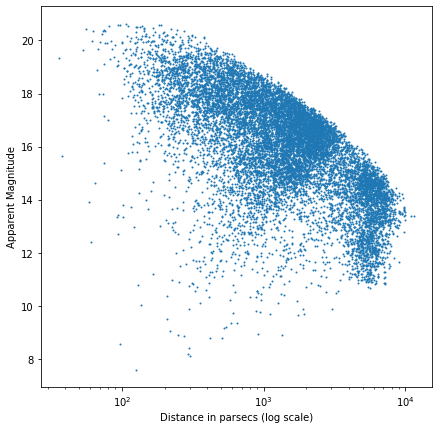

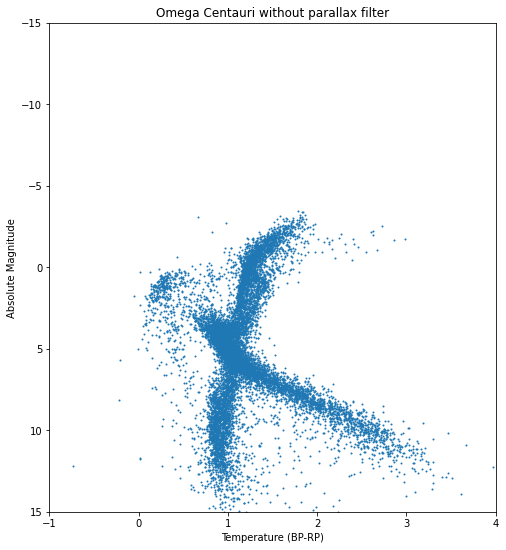

In [ ]:
#Omega Centauri
query = '''SELECT TOP 50000 g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.pm, h.teff_gspphot, DISTANCE(
POINT(201.7, -47.48),
POINT(g.ra, g.dec)) AS ang_sep
FROM gaiadr3.gaia_source AS g, gaiadr3.astrophysical_parameters AS h
WHERE 1 = CONTAINS(
POINT(201.7, -47.48),
CIRCLE(ra, dec, 0.6))
AND g.source_id = h.source_id
AND g.parallax > 0
AND g.parallax_over_error > 5
ORDER BY ang_sep ASC'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri without parallax filter')
plt.show()

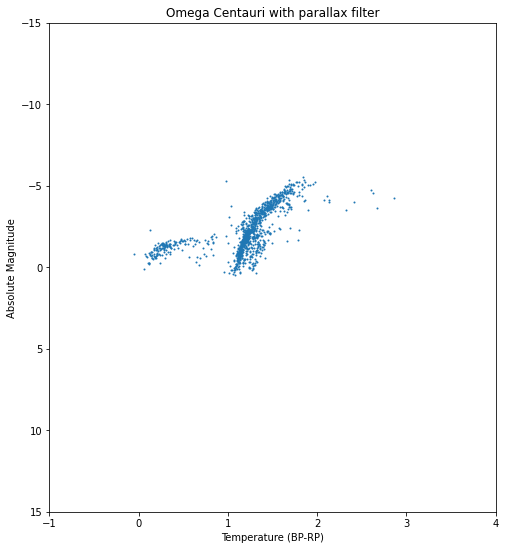

In [ ]:

mask = r['parallax'] > 0.18
r = r[mask]

mask = r['parallax'] < 0.25
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 3.26*1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri with parallax filter')
plt.show()

In [6]:
!pip install isochrones

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for isochrones: filename=isochrones-2.1-py3-none-any.whl size=93782 sha256=bbdb6b5dd3c5775420aa031a7e95585d3715036b5469965bbf88ea711981c69e
  Stored in directory: /root/.cache/pip/wheels/a1/3b/ef/6c475626f751b30cc195cd997b8030e079e0643e869c060e47
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=7a1efd891af40ee42124929696584ae423c31507831442a93a577629be953c76
  Stored in directory: /root/.cache/pip/wheels/a3/d7/75/19cd0d2a893cad4bb0b2b16dd572ad2916d19c0d5ee9612511
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=2a

In [11]:
from isochrones.mist import MISTIsochroneGrid

iso_grid = MISTIsochroneGrid()

In [9]:
#iso1 = mist.model_grid.df.xs((9.5, -0.5), level=(0, 1))
iso_grid = MISTIsochroneGrid()

In [13]:
k = iso_grid.df

In [14]:
m = k[k.feh <= -1.3]

In [ ]:
m = m[m.feh >= -1.4]

In [ ]:
m = m[m.age == 11.5]

In [ ]:
k.age.unique()

array([ 5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,  5.4 ,
        5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,  5.85,
        5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,  6.3 ,
        6.35,  6.4 ,  6.45,  6.5 ,  6.55,  6.6 ,  6.65,  6.7 ,  6.75,
        6.8 ,  6.85,  6.9 ,  6.95,  7.  ,  7.05,  7.1 ,  7.15,  7.2 ,
        7.25,  7.3 ,  7.35,  7.4 ,  7.45,  7.5 ,  7.55,  7.6 ,  7.65,
        7.7 ,  7.75,  7.8 ,  7.85,  7.9 ,  7.95,  8.  ,  8.05,  8.1 ,
        8.15,  8.2 ,  8.25,  8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,
        8.6 ,  8.65,  8.7 ,  8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,
        9.05,  9.1 ,  9.15,  9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,
        9.5 ,  9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,
        9.95, 10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 ])

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


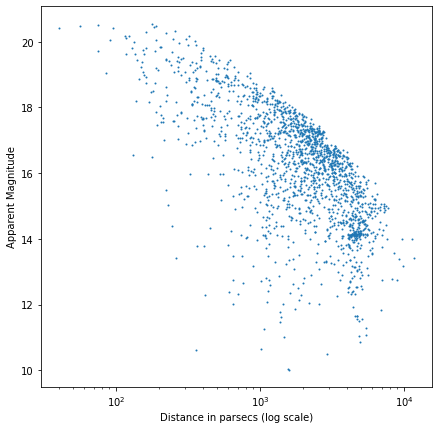

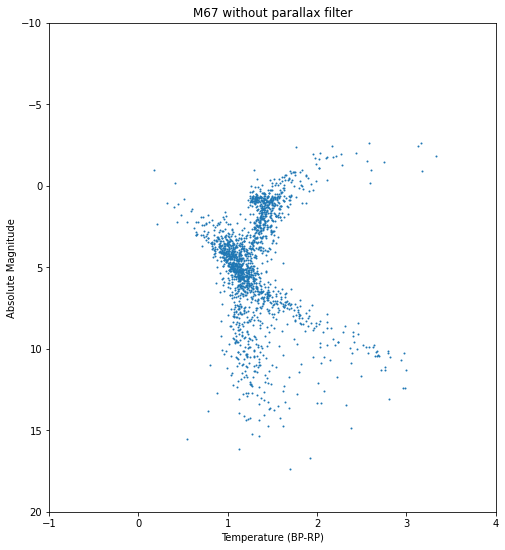

In [4]:
#M67
query = '''select top 10000 g.source_id, g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, phot_rp_mean_mag, g.pm,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between 298.327 and 298.5603 and
g.dec between 18.6625 and 18.8958
and g.parallax_over_error > 5
order by g.parallax desc, comb desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))



plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']


plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('M67 without parallax filter')
plt.show()

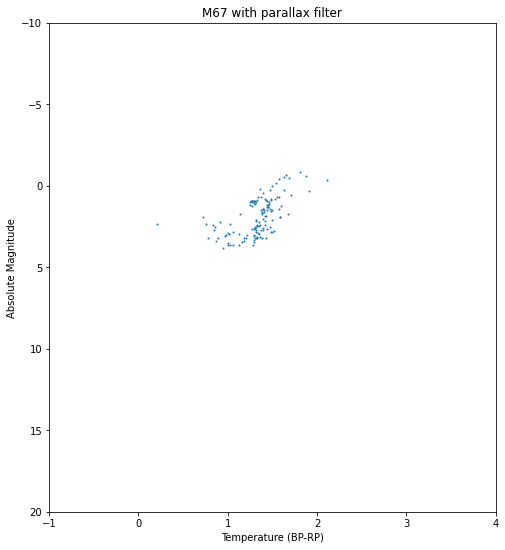

In [5]:
#r = r_m67
mask = r['parallax'] > 0.23
r1 = r[mask]
mask = r1['parallax'] < 0.27
r = r1[mask]

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-10,20)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('M67 with parallax filter')
plt.show()

In [15]:
k = iso_grid.df

In [36]:
n = n[n.feh >= -0.83]

In [40]:
m = n[n.age >= 10.2]
#m = n[n.age <= 9.9]

In [31]:
len(n)

2440

In [19]:
n.age.unique()

array([ 6.1 ,  6.15,  7.25,  7.45,  7.5 ,  7.55,  7.6 ,  7.65,  7.7 ,
        7.75,  7.8 ,  7.85,  7.9 ,  7.95,  8.  ,  8.05,  8.1 ,  8.15,
        8.2 ,  8.25,  8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,  8.6 ,
        8.65,  8.7 ,  8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,  9.05,
        9.1 ,  9.15,  9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,  9.5 ,
        9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,  9.95,
       10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 ])

In [35]:
n = k[k.feh <= -0.73]

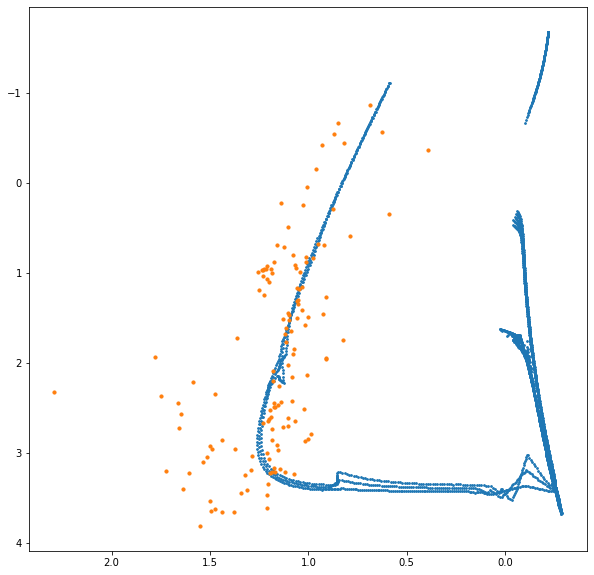

In [47]:
m = n[n.age >= 10.1]

plt.figure(figsize = (10,10))
plt.scatter(m.logTeff - 3.8, m.logL, s=3)
plt.scatter(-g+2.5,abmags,s=10)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


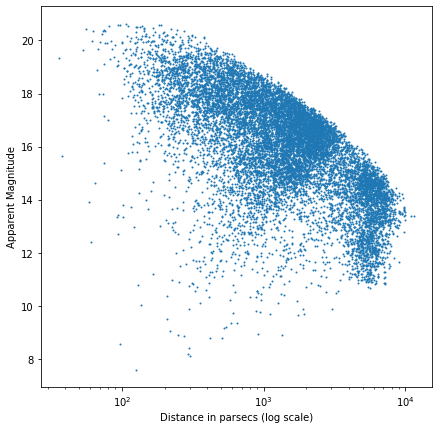

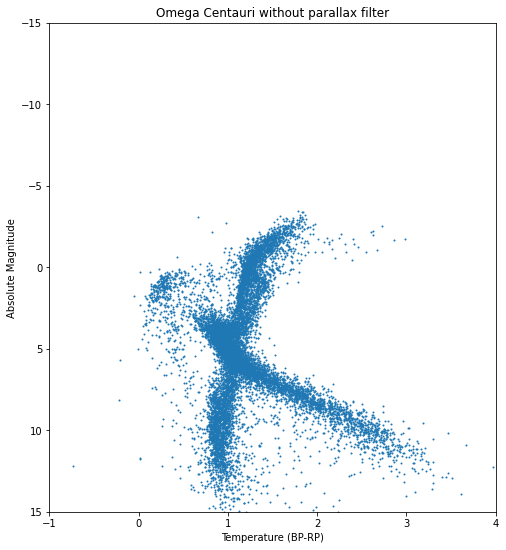

In [62]:
#Omega Centauri
query = '''SELECT TOP 50000 g.ra, g.dec, g.parallax, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
g.pm, h.teff_gspphot, DISTANCE(
POINT(201.7, -47.48),
POINT(g.ra, g.dec)) AS ang_sep
FROM gaiadr3.gaia_source AS g, gaiadr3.astrophysical_parameters AS h
WHERE 1 = CONTAINS(
POINT(201.7, -47.48),
CIRCLE(ra, dec, 0.6))
AND g.source_id = h.source_id
AND g.parallax > 0
AND g.parallax_over_error > 
ORDER BY ang_sep ASC'''

job = Gaia.launch_job_async(query)
r = job.get_results()

appmags = r['phot_g_mean_mag']
dist = 1000*np.reciprocal(r['parallax'])
plt.figure(figsize=(7,7))
plt.scatter(dist, appmags, s=1)
plt.xscale('log')
plt.xlabel('Distance in parsecs (log scale)')
plt.ylabel('Apparent Magnitude')
plt.show()

abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri without parallax filter')
plt.show()

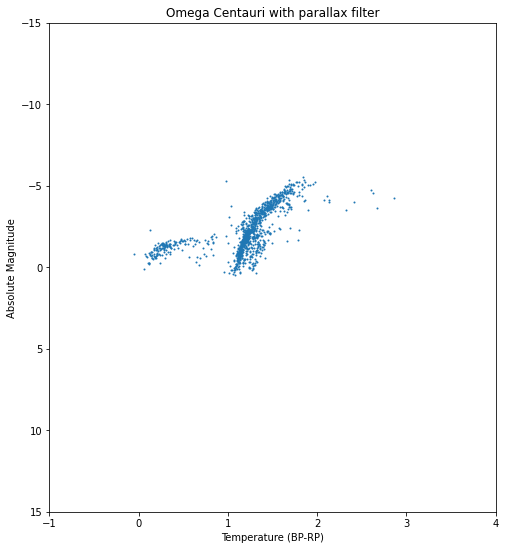

In [63]:
mask = r['parallax'] > 0.18
r = r[mask]

mask = r['parallax'] < 0.25
r = r[mask]

appmags = r['phot_g_mean_mag']
dist = 3.26*1000*np.reciprocal(r['parallax'])
abmags = appmags + 5 - 5*np.log10(dist)
#temps = r['teff_gspphot']
g = r['phot_bp_mean_mag'] - r['phot_rp_mean_mag']
plt.figure(figsize=(8,9))
plt.scatter(g,abmags,s=1)
plt.ylim(-15,15)
#plt.xlim(1000,30000)
plt.xlim(-1,4)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (BP-RP)')
plt.ylabel('Absolute Magnitude')
plt.title('Omega Centauri with parallax filter')
plt.show()